## Imports

In [1]:
import pandas as pd
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### telecharger la base de donnees

In [3]:
df = pd.read_csv(r'assets/tweets_suspect.csv')
df.head()

,message,label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1
1,is upset that he can't update his Facebook by ...,1
2,@Kenichan I dived many times for the ball. Man...,1
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",1


## Analyse des donnees

In [4]:
df

,message,label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",1
1,is upset that he can't update his Facebook by ...,1
2,@Kenichan I dived many times for the ball. Man...,1
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",1
...,...,...
59995,"Really wants to go and see 17 again, because Z...",1
59996,@krissa22 Thank you!,1
59997,dreaming of you,1
59998,@TheEllenShow I saw a clip online! good show!,1


<Axes: xlabel='label', ylabel='count'>

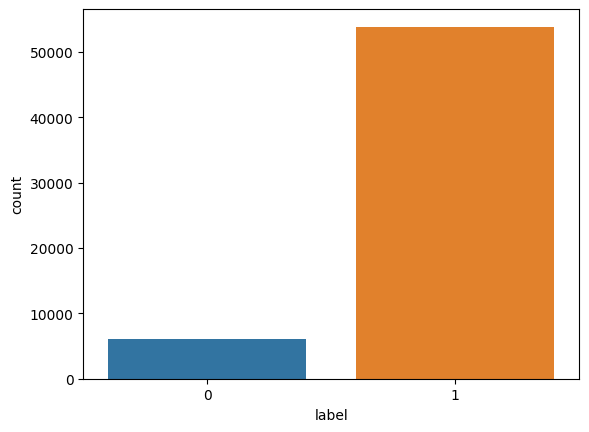

In [6]:
# plotting the data using countplot
sns.countplot(x="label",data=df)

la base de donnee n'est pas equilibres, cela peut entrainer un surraprentissage

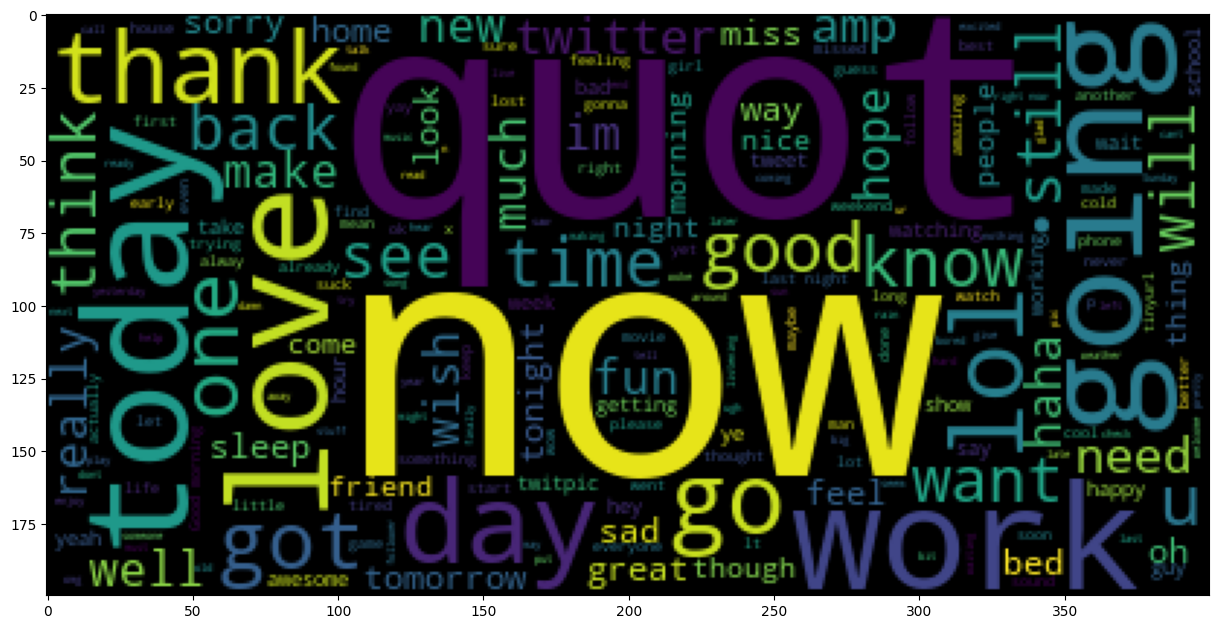

In [8]:
#nuage de mots des tweets positifs
positive_tweets = df[df['label'] == 1]['message'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))

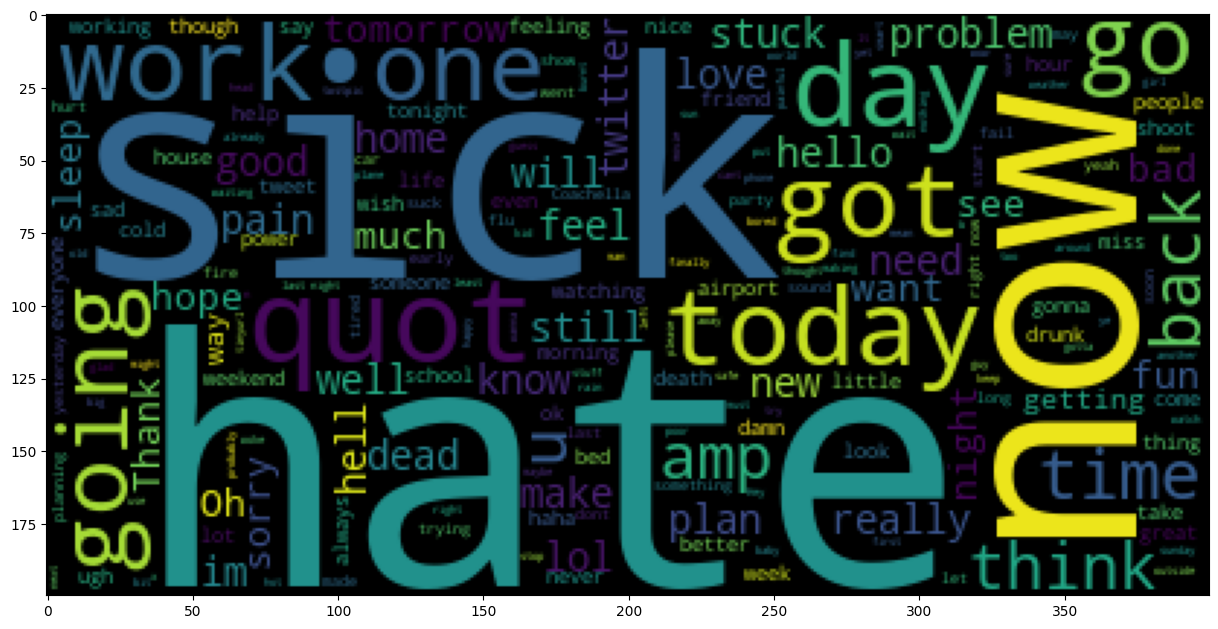

In [9]:
#nuage de mots des tweets negatif
positive_tweets = df[df['label'] == 0]['message'].tolist()
positive_tweets_string = " ".join(positive_tweets)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_tweets_string))

## Pretraitement


In [10]:
import re
import string
def tweets_cleaner(tweet):
    # removing the urls from the text
    tweet = re.sub(r'((www.\S+)|(https?://\S+))', r"", tweet)
    #removing the numbers from the text
    tweet = re.sub(r'[0-9]\S+', r'', tweet)
    #removing the tags from the text
    tweet = re.sub(r'(@\S+) | (#\S+)', r'', tweet)
    # removing the punctuation from the text
    tweet_without_punctuation = [char for char in tweet if char not   
                                in string.punctuation]
    # converting the list to string 
    tweet_without_punctuation = "".join(tweet_without_punctuation) 
    # set of stop words 
    stop_words = set(stopwords.words("english"))
    # removing the stop words 
    tweet_without_stopwords = [word for word in  
                              tweet_without_punctuation.split()
                              if word.lower() not in stop_words]
    return tweet_without_stopwords

## features extraction

In [11]:
# extract the features using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = tweets_cleaner, dtype =     
                            'uint8')
df_countvectorizer = vectorizer.fit_transform(df['message'])
df_countvectorizer.shape

(60000, 55012)

## entrainement

### division de la base de donnees

In [12]:
# splitting the features into train and test
X_train, X_test, y_train, y_test = train_test_split(  
                                                df_countvectorizer,  
                                                df["label"],   
                                                test_size=0.2,  
                                                 random_state=0)

### entrainement

In [13]:

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [57]:
pred = classifier.predict(X_test)

### evaluation

In [59]:
# model accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.63      0.42      0.51      1253
           1       0.94      0.97      0.95     10747

    accuracy                           0.91     12000
   macro avg       0.78      0.70      0.73     12000
weighted avg       0.90      0.91      0.91     12000



 Accuracy over 91%